# Read the data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://drive.google.com/file/d/1mnHCEXUJz5pxyHi41f0OMEFlKvt1sDGn/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
training_data = pd.read_csv(path)

# Analyse the data

In [ ]:
training_data.info()
#training_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
num_column_list = training_data.select_dtypes(include="number").columns.to_list()
num_column_list
#len(num_column_list)

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

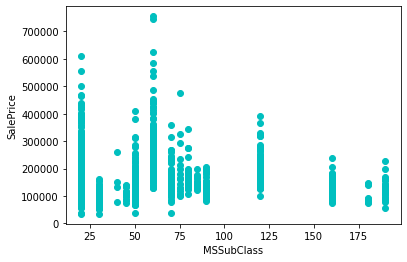

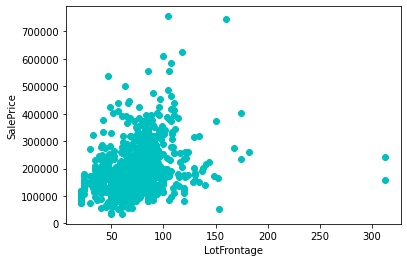

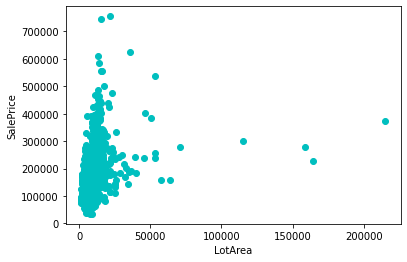

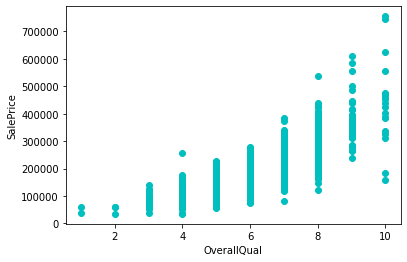

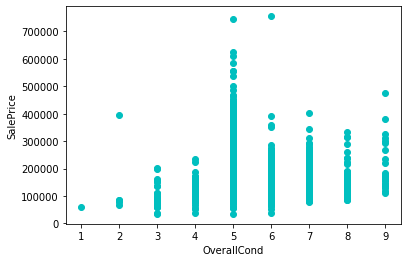

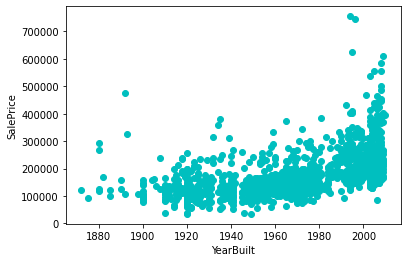

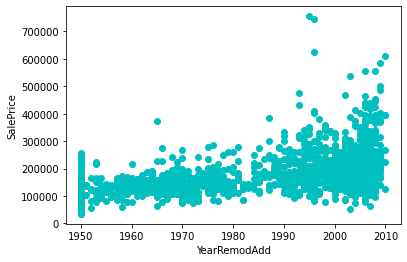

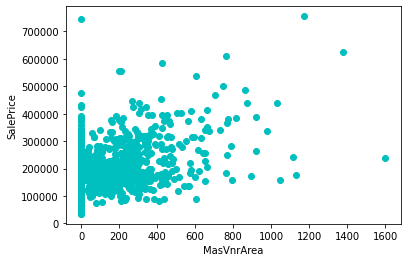

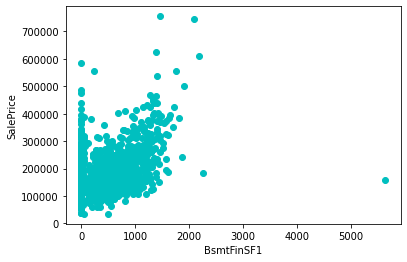

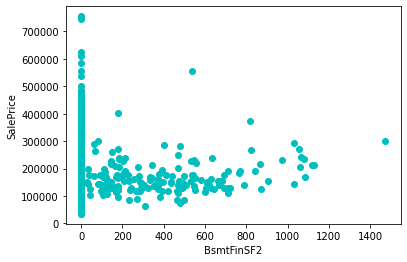

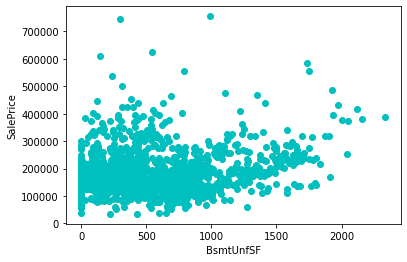

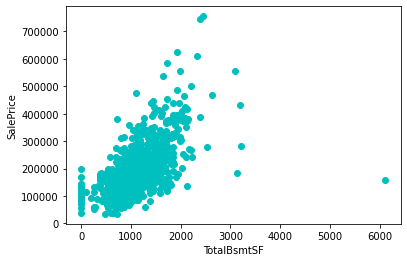

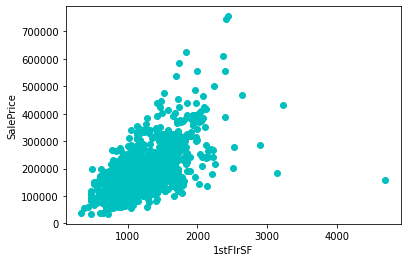

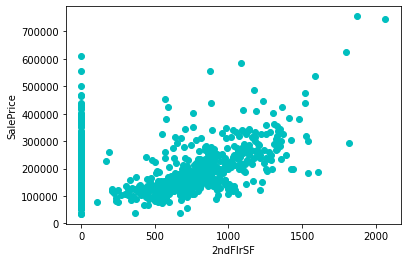

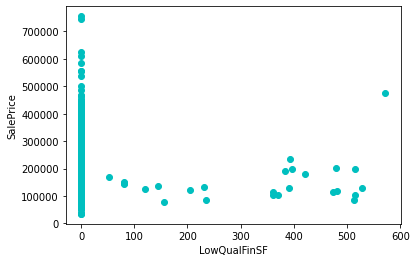

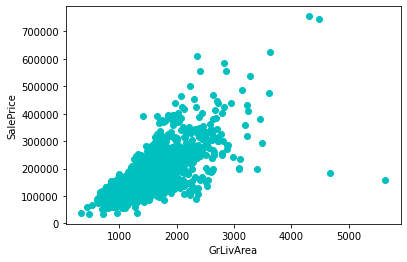

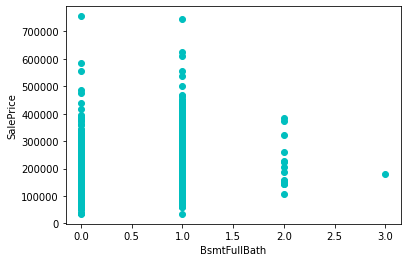

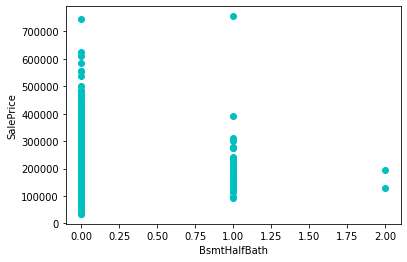

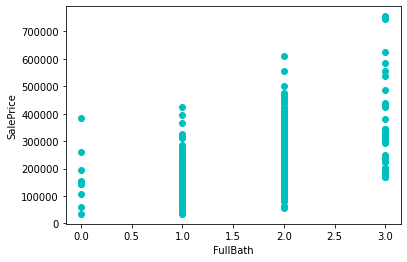

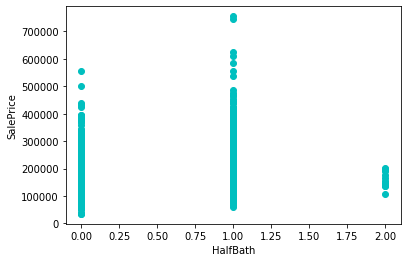

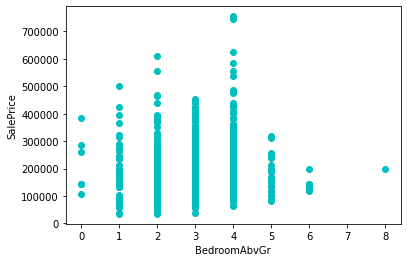

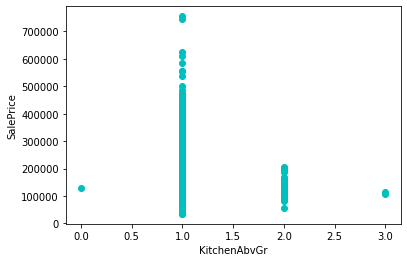

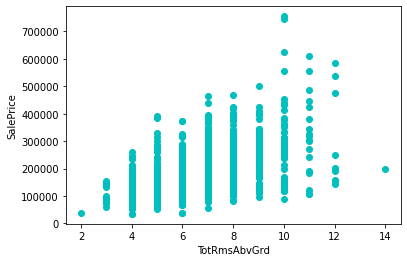

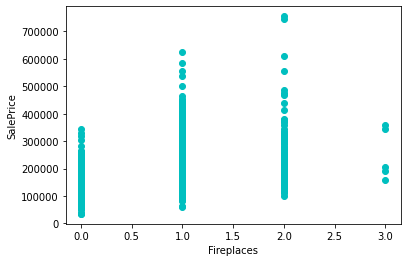

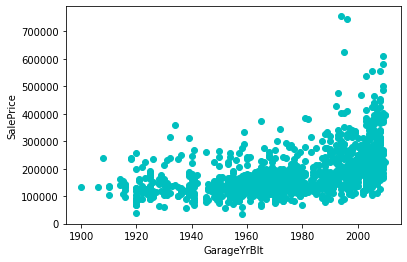

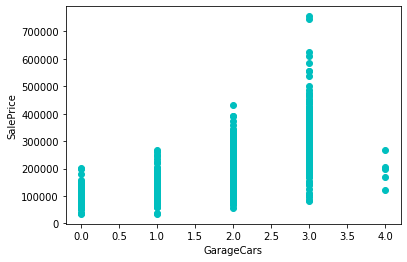

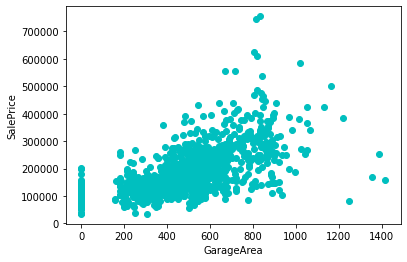

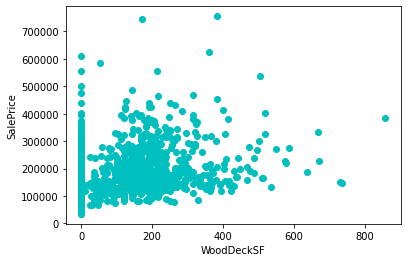

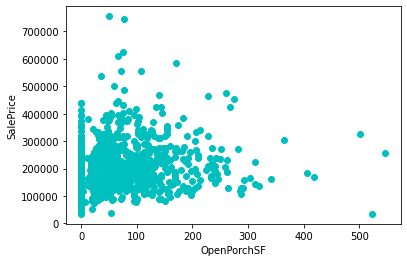

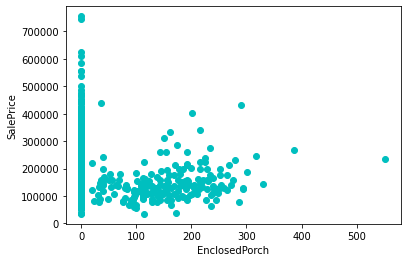

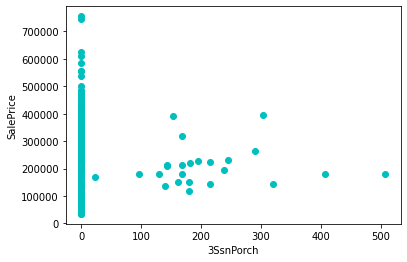

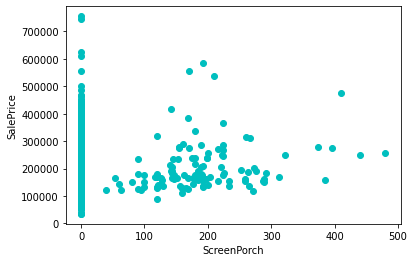

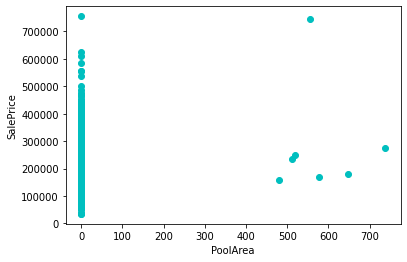

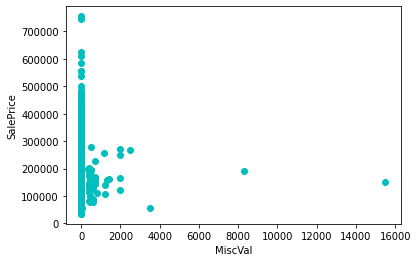

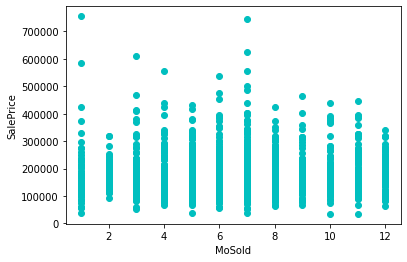

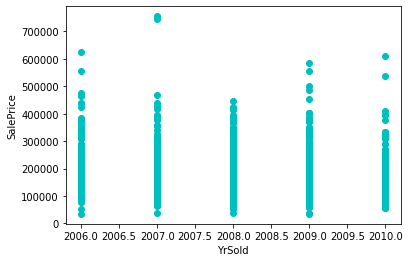

In [ ]:
for item in num_column_list[1:37]:
  plt.scatter(item, 'SalePrice', c='c', data=training_data)
  plt.xlabel(item)
  plt.ylabel('SalePrice')
  plt.show()

In [ ]:
# to analyse the category, the variablity of each feature, the freq, is the most ofen values
analysis = pd.DataFrame(training_data.select_dtypes(exclude="number").describe()).T
analysis.freq.sort_values(0, ascending = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  


Utilities        1459
Street           1454
Condition2       1445
RoofMatl         1434
Heating          1428
LandSlope        1382
CentralAir       1365
Functional       1360
PavedDrive       1340
Electrical       1334
GarageCond       1326
BsmtCond         1311
LandContour      1311
GarageQual       1311
ExterCond        1282
SaleType         1267
Condition1       1260
BsmtFinType2     1256
BldgType         1220
SaleCondition    1198
MSZoning         1151
RoofStyle        1141
LotConfig        1052
BsmtExposure      953
LotShape          925
ExterQual         906
GarageType        870
MasVnrType        864
HeatingQC         741
KitchenQual       735
HouseStyle        726
BsmtQual          649
Foundation        647
GarageFinish      605
Exterior1st       515
Exterior2nd       504
BsmtFinType1      430
FireplaceQu       380
Neighborhood      225
Fence             157
Alley              50
MiscFeature        49
PoolQC              3
Name: freq, dtype: object

In [ ]:
#training_data.select_type.head(5)
training_data.select_dtypes(exclude="number").GarageCond.value_counts()


TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [ ]:
training_data.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [ ]:
# how many null values in each column
#df_null = training_data.loc[training_data.isna().sum()> 0, :]
df_null = pd.DataFrame(training_data.isna().sum())
df_null = df_null.loc[df_null[0]>0]#.sort_values(ascending = False)
df_null.info()
df_null.sort_values(0, ascending=False)

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, LotFrontage to MiscFeature
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       19 non-null     int64
dtypes: int64(1)
memory usage: 304.0+ bytes


,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81


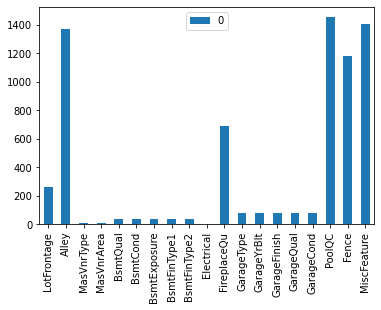

In [ ]:
df_null.plot.bar()

In [ ]:
training_data.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [ ]:
training_data.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [ ]:
training_data.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [ ]:
training_data.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [ ]:
training_data.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [ ]:
training_data.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [ ]:
training_data.duplicated().value_counts()


False    1460
dtype: int64

In [ ]:
training_data = training_data.drop_duplicates().value_counts()

In [ ]:
training_data.drop(labels=[313,335,249],inplace= True)
training_data.sort_values('LotArea',ascending = False).head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000


In [ ]:
training_data.drop(columns = ['Id','Utilities','PoolQC','Alley','Fence','Condition2','BsmtFullBath'],axis=1, inplace=True)

In [ ]:
X = training_data.drop(columns=['SalePrice'])
y = training_data['SalePrice']


# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# building the pipeline
X_cat = X_train.select_dtypes(exclude="number").copy()
X_num = X_train.select_dtypes(include="number").copy()

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))
 
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
       ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

In [ ]:
X.var().sort_values()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


KitchenAbvGr     4.854892e-02
BsmtFullBath     2.692682e-01
FullBath         3.035082e-01
Fireplaces       4.155947e-01
GarageCars       5.584797e-01
BedroomAbvGr     6.654938e-01
OverallCond      1.238322e+00
YrSold           1.763837e+00
OverallQual      1.912679e+00
TotRmsAbvGrd     2.641903e+00
MoSold           7.309595e+00
YearRemodAdd     4.262328e+02
LotFrontage      5.897492e+02
GarageYrBlt      6.095825e+02
3SsnPorch        8.595059e+02
YearBuilt        9.122154e+02
PoolArea         1.614216e+03
MSSubClass       1.789338e+03
LowQualFinSF     2.364204e+03
ScreenPorch      3.108889e+03
EnclosedPorch    3.735550e+03
OpenPorchSF      4.389861e+03
WoodDeckSF       1.570981e+04
BsmtFinSF2       2.602391e+04
MasVnrArea       3.278497e+04
GarageArea       4.571251e+04
1stFlrSF         1.494501e+05
2ndFlrSF         1.905571e+05
TotalBsmtSF      1.924624e+05
BsmtUnfSF        1.952464e+05
BsmtFinSF1       2.080255e+05
MiscVal          2.461381e+05
GrLivArea        2.761296e+05
LotArea   

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA


full_pipeline = make_pipeline(preprocessor, 
                              MaxAbsScaler(),
                              VarianceThreshold(threshold=0),
                              LinearRegression())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
}

search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)
 

print(
        f"""
        MSE: {mean_squared_error(search.predict(X_test), y_test)}
        RMSE: {mean_squared_error(search.predict(X_test), y_test)**0.5}
        MAE: {mean_absolute_error(search.predict(X_test), y_test)}
        MAPE: {mean_absolute_percentage_error(search.predict(X_test), y_test)}
        R2 Score: {r2_score(search.predict(X_test), y_test)}
        """
    )

Fitting 5 folds for each of 2 candidates, totalling 10 fits

        MSE: 692312695.5513843
        RMSE: 26311.83565529749
        MAE: 17126.529498807537
        MAPE: 0.10111681237475528
        R2 Score: 0.8678487978950865
        


In [ ]:
import xgboost
print(xgboost.__version__)
from sklearn.preprocessing import MaxAbsScaler
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectKBest, f_regression


#model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

full_pipeline = make_pipeline(preprocessor, 
                              MaxAbsScaler(),
                              XGBRegressor())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "xgbregressor__max_depth":[3,4],
    "xgbregressor__eta":[0.1,0.15],
    "xgbregressor__subsample":[0.3,0.4],
    "xgbregressor__colsample_bytree":[0.3]
}

xgb_search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

xgb_search.fit(X_train, y_train)
 

print(
        f"""
        MSE: {mean_squared_error(xgb_search.predict(X_test), y_test)}
        RMSE: {mean_squared_error(xgb_search.predict(X_test), y_test)**0.5}
        MAE: {mean_absolute_error(xgb_search.predict(X_test), y_test)}
        MAPE: {mean_absolute_percentage_error(xgb_search.predict(X_test), y_test)}
        R2 Score: {r2_score(xgb_search.predict(X_test), y_test)}
        """
    )

0.90
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[21:16:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:16:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:16:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:16:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:16:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:16:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:16:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:16:17] WARNING: /workspace/src/objective/

In [ ]:
#lr-1
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFECV

RFE_selector_tree = RFECV(LinearRegression)


full_pipeline = make_pipeline(preprocessor, 
                              #SelectKBest(f_regression),
                              MaxAbsScaler(),
                             LinearRegression())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    #"selectkbest__k":[4, 6]
}

search_1 = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_1.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'Lo...
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                                       ('maxabsscaler', MaxAbsScaler()),
              

In [ ]:
print(
        f"""
        MSE: {mean_squared_error(search_1.predict(X_test), y_test)}
        RMSE: {mean_squared_error(search_1.predict(X_test), y_test)**0.5}
        MAE: {mean_absolute_error(search_1.predict(X_test), y_test)}
        MAPE: {mean_absolute_percentage_error(search_1.predict(X_test), y_test)}
        R2 Score: {r2_score(search_1.predict(X_test), y_test)}
        """
    )


        MSE: 692312695.5513843
        RMSE: 26311.83565529749
        MAE: 17126.529498807537
        MAPE: 0.10111681237475528
        R2 Score: 0.8678487978950865
        


In [ ]:
#knn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_regression


my_scale = MaxAbsScaler()
full_pipeline = make_pipeline(preprocessor, 
                              my_scale,
                              SelectKBest(f_regression),
                             #VarianceThreshold(threshold=0),                             
                            KNeighborsRegressor())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
      "selectkbest__k":[4, 6],
    "kneighborsregressor__n_neighbors": range(2,40),
    "kneighborsregressor__weights": ["uniform", "distance"]
}

knn_search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)
knn_search.fit(X_train, y_train)


Fitting 5 folds for each of 304 candidates, totalling 1520 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'Lo...
                                       ('maxabsscaler', MaxAbsScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7f9314bd5b00>)),
                                       ('kneighborsregressor',
                         

In [ ]:
print(
        f"""
        MSE: {mean_squared_error(knn_search.predict(X_test), y_test)}
        RMSE: {mean_squared_error(knn_search.predict(X_test), y_test)**0.5}
        MAE: {mean_absolute_error(knn_search.predict(X_test), y_test)}
        MAPE: {mean_absolute_percentage_error(knn_search.predict(X_test), y_test)}
        R2 Score: {r2_score(knn_search.predict(X_test), y_test)}
        """
    )


        MSE: 926254533.6706253
        RMSE: 30434.43006975201
        MAE: 21201.633353546473
        MAPE: 0.11637212091743576
        R2 Score: 0.7877751541392956
        


In [ ]:
#DecisionTreeRegressor
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MaxAbsScaler

RFE_selector_tree = RFECV(DecisionTreeRegressor())

full_pipeline = make_pipeline(preprocessor, 
                              MaxAbsScaler(),
                            RFE_selector_tree,
                             DecisionTreeRegressor())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    #"selectkbest__k":[5,10,20,30,35],
     "decisiontreeregressor__max_depth":[4, 6],
    "decisiontreeregressor__min_samples_leaf": [3, 4]
}

dt_search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

dt_search.fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


KeyboardInterrupt: ignored

In [ ]:
print(
        f"""
        MSE: {mean_squared_error(dt_search.predict(X_test), y_test)}
        RMSE: {mean_squared_error(dt_search.predict(X_test), y_test)**0.5}
        MAE: {mean_absolute_error(dt_search.predict(X_test), y_test)}
        MAPE: {mean_absolute_percentage_error(dt_search.predict(X_test), y_test)}
        R2 Score: {r2_score(dt_search.predict(X_test), y_test)}
        """
    )


        MSE: 1570578518.7547429
        RMSE: 39630.5250880523
        MAE: 24336.210402696615
        MAPE: 0.12490473240571098
        R2 Score: 0.6924326533580726
        


In [ ]:
#Randomforestregression

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MaxAbsScaler

full_pipeline = make_pipeline(preprocessor, 
                              MaxAbsScaler(),
                              VarianceThreshold(threshold=0),
                            SelectKBest(f_regression),
                            RandomForestRegressor())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "selectkbest__k":[11,12,14],
    'randomforestregressor__max_depth':[3,5,7],
    'randomforestregressor__max_features':[5,7,10]
}

rd_search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)
rd_search.fit(X_train, y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'Lo...
                                        VarianceThreshold(threshold=0)),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7f9314bd5b00>)),
                                       ('randomforestregressor',
                       

In [ ]:
print(
        f"""
        MSE: {mean_squared_error(rd_search.predict(X_test), y_test)}
        RMSE: {mean_squared_error(rd_search.predict(X_test), y_test)**0.5}
        MAE: {mean_absolute_error(rd_search.predict(X_test), y_test)}
        MAPE: {mean_absolute_percentage_error(rd_search.predict(X_test), y_test)}
        R2 Score: {r2_score(rd_search.predict(X_test), y_test)}
        """
    )


        MSE: 776882843.893962
        RMSE: 27872.618174365358
        MAE: 18679.505739512846
        MAPE: 0.10277648294413838
        R2 Score: 0.8265085527242613
        


In [ ]:
submission = pd.DataFrame(columns=["Id", "SalePrice"])

In [ ]:
url = "https://drive.google.com/file/d/1fOdT7-Nev6wWiOfynV3dy7RDR4rOSE69/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
test_data =  pd.read_csv(path)

In [ ]:
submission['Id'] = test_data['Id'] 

In [ ]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
pred = xgb_search.predict(test_data)

In [ ]:
submission['SalePrice'] = pred

In [ ]:
#submission.to_csv("submission.csv", index=False)

In [ ]:
from google.colab import files
submission.to_csv('submission.csv', index=False) 
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Store the modelling pipeline with pickle


In [ ]:
##import pickle
#pickle.dump(search, 
           # open(file = 'https://drive.google.com/drive/folders/1VBtWmmBN_mO7j6vELtLPAUMhwpFY7NBS?usp=sharing')

